In [25]:
!pip install mlrose_hiive

import mlrose_hiive
import numpy as np
import pandas as pd
np.random.seed(44)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Define a Fitness Function

In [ ]:
# rhc_run_stats = pd.read_pickle("./pickles/knapsack_rhc_run_stats.pkl")
# rhc_run_curves = pd.read_pickle("./pickles/knapsack_rhc_run_curves.pkl")
# sa_run_stats = pd.read_pickle("./pickles/knapsack_sa_run_stats.pkl")
# sa_run_curves = pd.read_pickle("./pickles/knapsack_sa_run_curves.pkl")
# ga_run_stats = pd.read_pickle("./pickles/knapsack_ga_run_stats.pkl")
# ga_run_curves = pd.read_pickle("./pickles/knapsack_ga_run_curves.pkl")
# mmc_run_stats = pd.read_pickle("./pickles/knapsack_mmc_run_stats.pkl")
# mmc_run_curves = pd.read_pickle("./pickles/knapsack_mmc_run_curves.pkl")

In [26]:
knapsack_len = 150
# weights between 10 to 40
knapsack_weights=np.random.uniform(10,40,knapsack_len)
# values between 20 to 30
knapsack_values=np.random.uniform(20,30,knapsack_len)
max_weight_pct = 0.5
problem = mlrose_hiive.KnapsackOpt(weights=knapsack_weights, values=knapsack_values,
                                  max_weight_pct=max_weight_pct)

## Define an Optimization Problem Object
We use the fitness function as input into the optimization problem

__TSPOpt() descrive TSP optimization__

### Random Hill Climb

In [5]:
%%time
# DiscreteOpt() takes integers in range 0 to max_val-1

runner_return = mlrose_hiive.RHCRunner(problem, experiment_name="first_try", 
                                       iteration_list=[10000],
                                       seed=44, max_attempts=100, 
                                       restart_list=[100])
rhc_run_stats, rhc_run_curves = runner_return.run()

Running rhc
*****************
*** Run START ***
*****************
restarts:[100], max_iters:[10000], current_restart:[0]
runner_name:[rhc], experiment_name:[first_try], attempt:[0], iteration:[0], done:[False], time:[0.01], fitness:[1866.5665]
	[0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0// 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0// 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0...

restarts:[100], max_iters:[10000], current_restart:[0]
runner_name:[rhc], experiment_name:[first_try], attempt:[101], iteration:[106], done:[True], time:[0.02], fitness:[1931.0828]
	[1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0// 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0// 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0...

restarts:[100], max_iters:[10000], current_restart:[1]
runner_name:[rhc], experiment_name:[first_try], attempt:[0], iteration:[0], done:[False], time:[0.03], fitne

In [6]:
rhc_run_stats

,Iteration,Fitness,Time,State,Restarts,max_iters,current_restart
0,0,1866.566515,0.005184,"[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...",100,10000,0
1,10000,1931.082801,0.018058,"[1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...",100,10000,0
2,0,0.000000,0.030792,"[0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, ...",100,10000,1
3,10000,0.000000,0.041728,"[0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, ...",100,10000,1
4,0,1896.281884,0.045489,"[1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, ...",100,10000,2
...,...,...,...,...,...,...,...
197,10000,0.000000,8.317931,"[0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, ...",100,10000,98
198,0,1789.276153,8.341527,"[0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, ...",100,10000,99
199,10000,1916.038293,8.466110,"[0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, ...",100,10000,99
200,0,0.000000,8.492148,"[0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, ...",100,10000,100


In [7]:
rhc_run_curves

,Iteration,Time,Fitness,Restarts,max_iters,current_restart
0,0,0.005184,1887.803608,100,10000,0
1,1,0.006381,1887.803608,100,10000,0
2,2,0.006467,1909.349141,100,10000,0
3,3,0.006633,1909.349141,100,10000,0
4,4,0.006745,1909.349141,100,10000,0
...,...,...,...,...,...,...
11337,11337,8.461217,0.000000,100,10000,100
11338,11338,8.462283,0.000000,100,10000,100
11339,11339,8.463343,0.000000,100,10000,100
11340,11340,8.464984,0.000000,100,10000,100


In [8]:
best_index_in_curve = rhc_run_curves.Fitness.idxmax()
best_decay = rhc_run_curves.iloc[best_index_in_curve].current_restart
best_curve = rhc_run_curves.loc[rhc_run_curves.current_restart == best_decay, :]
best_curve.reset_index(inplace=True)
best_decay

8.0

Text(0, 0.5, 'Value')

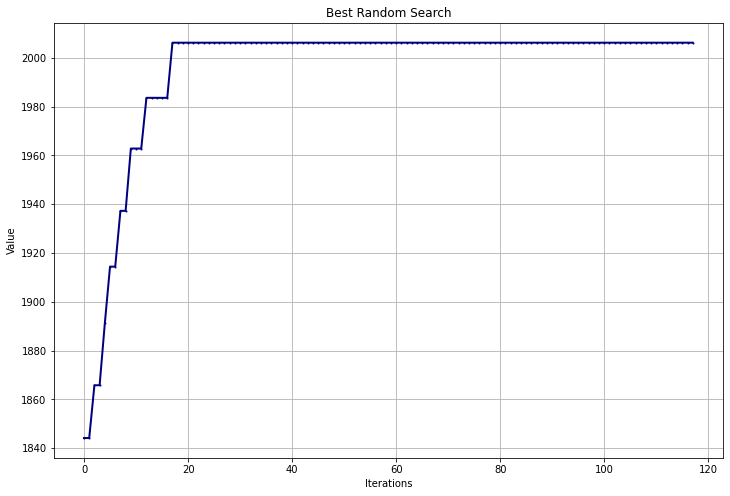

In [9]:
ax = best_curve.Fitness.plot(lw=2, colormap='jet', marker='.', markersize=2, 
                             figsize=(12,8), grid=1,
                             title='Best Random Search')
ax.set_xlabel("Iterations")
ax.set_ylabel("Value")

In [10]:
last_iters = rhc_run_stats[rhc_run_stats.Iteration != 0].reset_index()
print(last_iters.Fitness.mean(), last_iters.Fitness.max())
print(last_iters.Time.max())

1164.8526237082997 2006.2210234989425
8.611570835000066


## Simulated Annealing

In [11]:
%%time
sa = mlrose_hiive.SARunner(problem, experiment_name="SA_Exp", 
                           iteration_list=[100000],
                           temperature_list=[1, 10, 50, 100, 250, 500, 1000, 2500, 5000],
                           decay_list=[mlrose_hiive.ExpDecay,
                                       mlrose_hiive.GeomDecay],
                           seed=44, max_attempts=100)

sa_run_stats, sa_run_curves = sa.run()   

Running sa
*****************
*** Run START ***
*****************
schedule:[1], max_iters:[100000]
runner_name:[sa], experiment_name:[SA_Exp], attempt:[0], iteration:[0], done:[False], time:[0.00], fitness:[1866.5665]
	[0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0// 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0// 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0...

schedule:[1], max_iters:[100000]
runner_name:[sa], experiment_name:[SA_Exp], attempt:[101], iteration:[120], done:[True], time:[0.02], fitness:[1972.0696]
	[0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0// 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 1 0// 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
schedule:[1], max_iters:[100000]
runner_name:[sa], experiment_name:[SA_Exp], attempt:[0], iteration:[0], done:[Fal

In [12]:
sa_run_stats

,Iteration,Fitness,Time,State,schedule_type,schedule_init_temp,schedule_exp_const,schedule_min_temp,schedule_current_value,Temperature,max_iters,schedule_decay
0,0,1866.566515,0.000231,"[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...",exponential,1,0.005,0.001,0.999999,1,100000,NaN
1,100000,1972.069597,0.015364,"[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...",exponential,1,0.005,0.001,0.999923,1,100000,NaN
2,0,1866.566515,0.000284,"[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...",geometric,1,NaN,0.001,0.999997,1,100000,0.99
3,100000,1972.069597,0.015514,"[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...",geometric,1,NaN,0.001,0.999844,1,100000,0.99
4,0,1866.566515,0.000546,"[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...",exponential,10,0.005,0.001,9.999973,10,100000,NaN
5,100000,2033.477379,0.033964,"[0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...",exponential,10,0.005,0.001,9.998302,10,100000,NaN
6,0,1866.566515,0.000139,"[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...",geometric,10,NaN,0.001,9.999986,10,100000,0.99
7,100000,2007.230949,0.015415,"[0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...",geometric,10,NaN,0.001,9.998451,10,100000,0.99
8,0,1866.566515,0.000131,"[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...",exponential,50,0.005,0.001,49.999967,50,100000,NaN
9,100000,1939.007593,0.066773,"[0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, ...",exponential,50,0.005,0.001,49.983309,50,100000,NaN


In [13]:
sa_run_curves

,Iteration,Time,Fitness,Temperature,max_iters
0,0,0.000231,1887.803608,1,100000
1,1,0.001302,1887.803608,1,100000
2,2,0.001416,1887.803608,1,100000
3,3,0.001513,1887.803608,1,100000
4,4,0.001605,1914.072566,1,100000
...,...,...,...,...,...
11034,11034,0.126278,2022.537884,5000,100000
11035,11035,0.126464,2022.537884,5000,100000
11036,11036,0.126629,2022.537884,5000,100000
11037,11037,0.126793,2022.537884,5000,100000


In [14]:
last_iters = sa_run_stats[sa_run_stats.Iteration != 0].reset_index()
print(last_iters.Fitness.mean(), last_iters.Fitness.max())
print(last_iters.Time.mean())

1981.76190311197 2089.243219479692
0.10405896327778111


In [15]:
best_index_in_curve = sa_run_curves.Fitness.idxmax()
best_decay = sa_run_curves.iloc[best_index_in_curve].Temperature
best_curve = sa_run_curves.loc[sa_run_curves.Temperature == best_decay, :]
best_curve.reset_index(inplace=True)
best_decay

ExpDecay(init_temp=250, exp_const=0.005, min_temp=0.001)

Text(0, 0.5, 'Value')

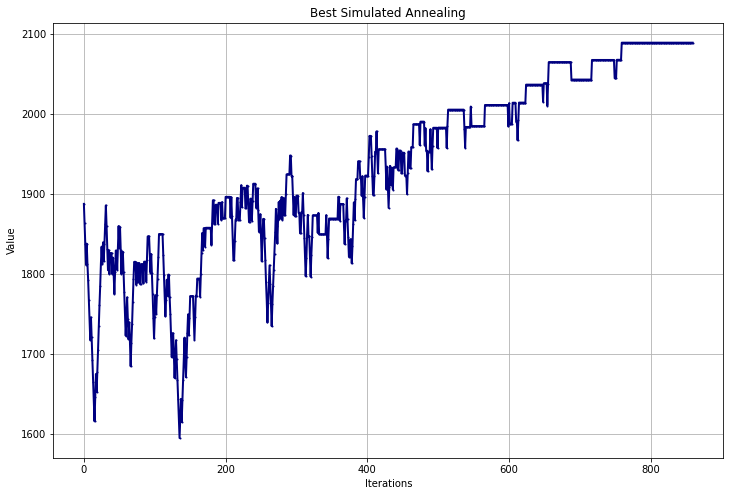

In [16]:
ax = best_curve.Fitness.plot(lw=2, colormap='jet', marker='.', markersize=2, 
                             figsize=(12,8), grid=1,
                             title='Best Simulated Annealing')
ax.set_xlabel("Iterations")
ax.set_ylabel("Value")

## Genetic Alg

In [17]:
%%time
ga = mlrose_hiive.GARunner(problem=problem,
                          experiment_name="GA_Exp",
                          seed=44,
                          iteration_list=[100000],
                          max_attempts=100,
                          population_sizes=[500, 1000],
                          mutation_rates=[0.1, 0.25, 0.5])
ga_run_stats, ga_run_curves = ga.run()   

Running ga
*****************
*** Run START ***
*****************
pop_size:[500], mutation_prob:[0.1], max_iters:[100000]
runner_name:[ga], experiment_name:[GA_Exp], attempt:[0], iteration:[0], done:[False], time:[0.03], fitness:[1866.5665]
	[0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0// 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0// 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0...

pop_size:[500], mutation_prob:[0.1], max_iters:[100000]
runner_name:[ga], experiment_name:[GA_Exp], attempt:[101], iteration:[302], done:[True], time:[17.53], fitness:[2421.3731]
	[0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 1// 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 1 0 1 1 1// 1 0 0 1 0 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 1 0...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
pop_size:[500], mutation_prob:[0.25], max_iters:[100000]
runner_nam

In [18]:
ga_run_stats

,Iteration,Fitness,Time,State,Population Size,Mutation Rate,max_iters
0,0,1866.566515,0.025241,"[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...",500,0.10,100000
1,100000,2421.373123,17.525639,"[0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, ...",500,0.10,100000
2,0,1866.566515,0.016187,"[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...",500,0.25,100000
3,100000,2418.060319,16.556260,"[0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, ...",500,0.25,100000
4,0,1866.566515,0.015339,"[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...",500,0.50,100000
5,100000,2419.872491,13.273428,"[0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, ...",500,0.50,100000
6,0,1866.566515,0.030132,"[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...",1000,0.10,100000
7,100000,2421.011479,29.830663,"[0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, ...",1000,0.10,100000
8,0,1866.566515,0.030738,"[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...",1000,0.25,100000
9,100000,2421.373123,43.307275,"[0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, ...",1000,0.25,100000


In [19]:
ga_run_curves

,Iteration,Time,Fitness,Population Size,Mutation Rate,max_iters
0,0,0.025241,1996.908403,500,0.1,100000
1,1,0.113992,1996.908403,500,0.1,100000
2,2,0.170398,1996.908403,500,0.1,100000
3,3,0.234099,2005.297256,500,0.1,100000
4,4,0.292076,2034.092718,500,0.1,100000
...,...,...,...,...,...,...
1682,1682,33.509571,2421.373123,1000,0.5,100000
1683,1683,33.629867,2421.373123,1000,0.5,100000
1684,1684,33.750960,2421.373123,1000,0.5,100000
1685,1685,33.871394,2421.373123,1000,0.5,100000


In [20]:
last_iters = ga_run_stats[ga_run_stats.Iteration != 0].reset_index()
print("Max and mean")
print(last_iters.Fitness.max(), last_iters.Fitness.mean(), last_iters.Time.mean())
print(last_iters.groupby("Mutation Rate").Fitness.mean())
print(last_iters.groupby("Population Size").Fitness.mean())
print(last_iters.groupby("Population Size").Time.mean())

Max and mean
2421.373122854511 2420.5106095336205 25.87448986033341
Mutation Rate
0.10    2421.192301
0.25    2419.716721
0.50    2420.622807
Name: Fitness, dtype: float64
Population Size
500     2419.768644
1000    2421.252575
Name: Fitness, dtype: float64
Population Size
500     15.785109
1000    35.963871
Name: Time, dtype: float64


In [21]:
best_index_in_curve = ga_run_curves.Fitness.idxmax()
best_decay = ga_run_curves.iloc[best_index_in_curve]['Mutation Rate']
best_curve = ga_run_curves.loc[ga_run_curves['Mutation Rate'] == best_decay, :]
best_curve.reset_index(inplace=True)
best_decay

0.1

Text(0, 0.5, 'Fitness Value')

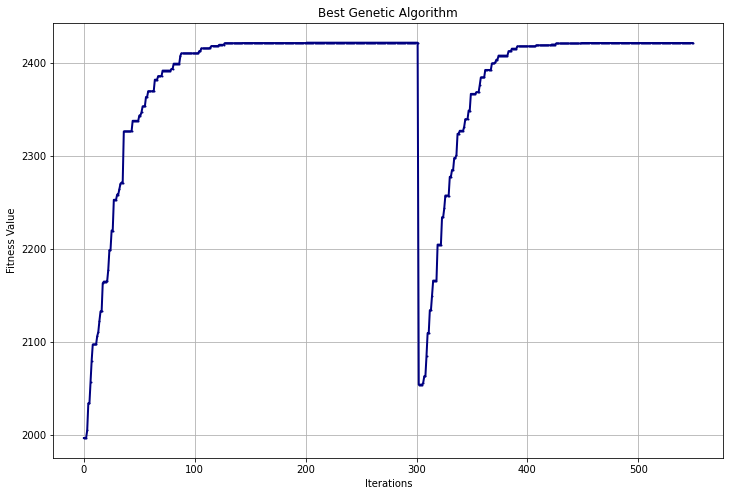

In [22]:
ax = best_curve.Fitness.plot(lw=2, colormap='jet', marker='.', markersize=2, 
                             figsize=(12,8), grid=1,
                             title='Best Genetic Algorithm')
ax.set_xlabel("Iterations")
ax.set_ylabel("Fitness Value")

## MIMIC

In [27]:
mmc = mlrose_hiive.MIMICRunner(problem=problem,
                          experiment_name="MMC_Exp",
                          seed=44,
                          iteration_list=[100000],
                          max_attempts=100,
                          population_sizes=[500,1000],
                          keep_percent_list=[0.1, 0.25, 0.5],
                          use_fast_mimic=True)

# the two data frames will contain the results
mmc_run_stats, mmc_run_curves = mmc.run()

Running mimic
*****************
*** Run START ***
*****************
use_fast_mimic:[True], pop_size:[500], keep_pct:[0.1], max_iters:[100000]
runner_name:[mimic], experiment_name:[MMC_Exp], attempt:[0], iteration:[0], done:[False], time:[0.03], fitness:[1866.5665]
	[0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 0// 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0// 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0...

use_fast_mimic:[True], pop_size:[500], keep_pct:[0.1], max_iters:[100000]
runner_name:[mimic], experiment_name:[MMC_Exp], attempt:[101], iteration:[121], done:[True], time:[35.87], fitness:[2382.8256]
	[0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0.// 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0.// 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. ...

***************
*** Run END ***
***************
*****************
*** Run START ***
*****************
use_fast_mimic:[True

In [28]:
mmc_run_stats

,Iteration,Fitness,Time,State,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0,1866.566515,0.027944,"[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...",True,500,0.10,100000
1,100000,2382.825633,35.871042,"[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",True,500,0.10,100000
2,0,1866.566515,0.019228,"[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...",True,500,0.25,100000
3,100000,2398.952851,37.882676,"[0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, ...",True,500,0.25,100000
4,0,1866.566515,0.016122,"[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...",True,500,0.50,100000
5,100000,2384.993386,47.125046,"[0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",True,500,0.50,100000
6,0,1866.566515,0.030859,"[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...",True,1000,0.10,100000
7,100000,2409.223942,64.537882,"[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...",True,1000,0.10,100000
8,0,1866.566515,0.029329,"[0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...",True,1000,0.25,100000
9,100000,2413.466486,69.466130,"[0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",True,1000,0.25,100000


In [29]:
mmc_run_curves

,Iteration,Time,Fitness,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0,0.027944,2058.327568,True,500,0.1,100000
1,1,0.142975,2084.481687,True,500,0.1,100000
2,2,0.233585,2146.925905,True,500,0.1,100000
3,3,0.322491,2152.163336,True,500,0.1,100000
4,4,0.409791,2204.823128,True,500,0.1,100000
...,...,...,...,...,...,...,...
869,869,81.561694,2405.893960,True,1000,0.5,100000
870,870,82.189646,2405.893960,True,1000,0.5,100000
871,871,82.828872,2405.893960,True,1000,0.5,100000
872,872,83.463841,2405.893960,True,1000,0.5,100000


In [30]:
last_iters = mmc_run_stats[mmc_run_stats.Iteration != 0].reset_index()
print("Max and mean")
print(last_iters.Fitness.max(), last_iters.Fitness.mean(), last_iters.Time.mean())
print(last_iters.groupby("Keep Percent").Fitness.mean())
print(last_iters.groupby("Population Size").Fitness.mean())
print(last_iters.groupby("Population Size").Time.mean())

Max and mean
2413.4664861237916 2399.2260431527316 57.12647914133322
Keep Percent
0.10    2396.024787
0.25    2406.209669
0.50    2395.443673
Name: Fitness, dtype: float64
Population Size
500     2388.923957
1000    2409.528129
Name: Fitness, dtype: float64
Population Size
500     40.292921
1000    73.960037
Name: Time, dtype: float64


In [31]:
best_index_in_curve = mmc_run_stats.Fitness.idxmax()
best_decay = mmc_run_stats.iloc[best_index_in_curve]['Population Size']
best_curve = mmc_run_stats.loc[mmc_run_stats['Population Size'] == best_decay, :]
best_curve.reset_index(inplace=True)
best_decay

1000

Text(0, 0.5, 'Fitness Value')

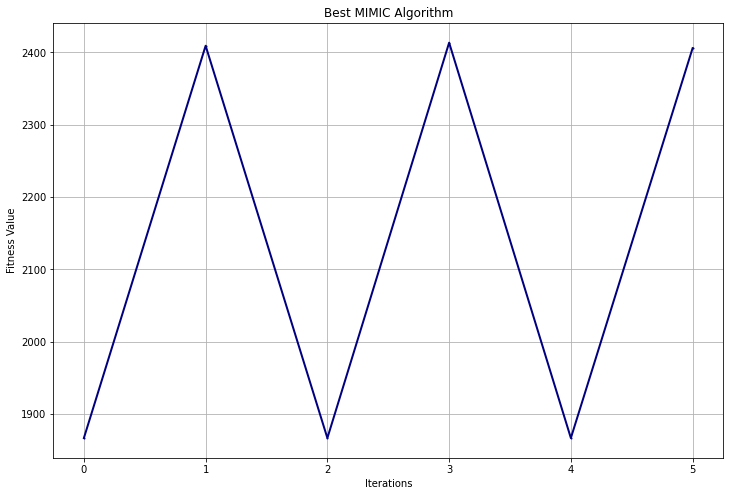

In [32]:
ax = best_curve.Fitness.plot(lw=2, colormap='jet', marker='.', markersize=2, 
                             figsize=(12,8), grid=1,
                             title='Best MIMIC Algorithm')
ax.set_xlabel("Iterations")
ax.set_ylabel("Fitness Value")

In [ ]:
rhc_run_stats.to_pickle("./knapsack_rhc_run_stats.pkl")
rhc_run_curves.to_pickle("./knapsack_rhc_run_curves.pkl")
sa_run_stats.to_pickle("./knapsack_sa_run_stats.pkl")
sa_run_curves.to_pickle("./knapsack_sa_run_curves.pkl")
ga_run_stats.to_pickle("./knapsack_ga_run_stats.pkl")
ga_run_curves.to_pickle("./knapsack_ga_run_curves.pkl")
mmc_run_stats.to_pickle("./knapsack_mmc_run_stats.pkl")
mmc_run_curves.to_pickle("./knapsack_mmc_run_curves.pkl")
